# Meteorology-SnowDegreeDay coupling: Grid ptypes

**Goal:** Try to successfully run a coupled `Meteorology-SnowDegreeDay` simulation, with `Meteorology` as the driver, and with Grid inputs for `SnowDegreeDay`.

Import the Babel-wrapped `Meteorology` and `SnowDegreeDay` components and create instances:

In [1]:
from cmt.components import Meteorology, SnowDegreeDay
met, sno = Meteorology(), SnowDegreeDay()

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/framework/
parent_dir    = /home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/
examples_dir  = /home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/examples/
__file__      = /home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


Initialize the components with cfg files that, for simplicity, use the same time step and run duration:

In [2]:
met.initialize('./input/meteorology-2.cfg')
sno.initialize('./input/snow_degree_day-2.cfg')

/home/csdms/wmt/topoflow.1/conda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/utils/model_input.py:119: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (data == None):
/home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/components/snow_degree_day.py:340: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (c0 != None): self.c0 = c0
/home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/components/snow_degree_day.py:343: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (T0 != None): self.T0 = T0
/home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/components/snow_degree_day.py:346: FutureWarning

 
Meteorology component: Initializing...
In read_input_files():
   min(P) = 5.0  [mmph]
   max(P) = 5.0  [mmph]
 
SORRY: Cannot yet create lon and lat grids for
       this DEM because it uses UTM coordinates.
       Will use lat/lon for Denver, Colorado.
 
Imported netCDF4 version: 1.2.2
 
Snow component: Initializing...
Imported netCDF4 version: 1.2.2


Store initial values of time, snow depth, and air temperature:

In [3]:
time = [met.get_current_time()]
snow_depth = [sno.get_value('snowpack__depth').max()]
air_temp = [met.get_value('atmosphere_bottom_air__temperature').max()]

Run the coupled models to completion. In each time step, perform the following actions:

1. Get variables from `Meteorology`; set into `SnowDegreeDay`
1. Advance `SnowDegreeDay`
1. Get variables from `SnowDegreeDay`; set into `Meteorology`
1. Advance `Meteorology`

In [4]:
count = 1
while met.get_current_time() < met.get_end_time():
    T_air = met.get_value('atmosphere_bottom_air__temperature')
    P_snow = met.get_value('atmosphere_water__snowfall_leq-volume_flux')
    T_surf = met.get_value('land_surface__temperature')
    rho_H2O = met.get_value('water-liquid__mass-per-volume_density')
    sno.set_value('atmosphere_bottom_air__temperature', T_air)
    sno.set_value('atmosphere_water__snowfall_leq-volume_flux', P_snow)
    sno.set_value('land_surface__temperature', T_surf)
    sno.set_value('water-liquid__mass-per-volume_density', rho_H2O)
    
    sno.update(sno.get_time_step()*count)

    rho_snow = sno.get_value('snowpack__z_mean_of_mass-per-volume_density')
    h_snow = sno.get_value('snowpack__depth')
    h_swe = sno.get_value('snowpack__liquid-equivalent_depth')
    SM = sno.get_value('snowpack__melt_volume_flux')
    met.set_value('snowpack__z_mean_of_mass-per-volume_density', rho_snow)
    met.set_value('snowpack__depth', h_snow)
    met.set_value('snowpack__liquid-equivalent_depth', h_swe)
    met.set_value('snowpack__melt_volume_flux', SM)

    met.update(met.get_time_step()*count)
    
    time.append(met.get_current_time())
    snow_depth.append(sno.get_value('snowpack__depth').max())
    air_temp.append(met.get_value('atmosphere_bottom_air__temperature').max())
    
    count += 1

/home/csdms/wmt/topoflow.1/opt/topoflow/topoflow/components/solar_funcs.py:740: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (hour_num != None):


In [5]:
print time

[0.0, 600.0, 1200.0, 1800.0, 2400.0, 3000.0, 3600.0, 4200.0, 4800.0, 5400.0, 6000.0, 6600.0, 7200.0, 7800.0, 8400.0, 9000.0, 9600.0, 10200.0, 10800.0, 11400.0, 12000.0, 12600.0, 13200.0, 13800.0, 14400.0, 15000.0, 15600.0, 16200.0, 16800.0, 17400.0, 18000.0, 18600.0, 19200.0, 19800.0, 20400.0, 21000.0, 21600.0]


In [6]:
print snow_depth

[1.0, 0.49967501986228896, 0.49935001985636296, 0.49902501985043696, 0.49870001984451096, 0.49837501983858495, 0.49805001983265895, 0.49772501982673295, 0.49740001982080695, 0.49707501981488095, 0.49675001980895495, 0.49642501980302894, 0.49610001979710294, 0.49577501979117694, 0.49545001978525094, 0.49512501977932494, 0.49480001977339894, 0.49447501976747293, 0.49415001976154693, 0.49382501975562093, 0.49350001974969493, 0.49317501974376893, 0.49285001973784293, 0.49252501973191692, 0.49220001972599092, 0.49187501972006492, 0.49155001971413892, 0.49122501970821292, 0.49090001970228692, 0.49057501969636091, 0.49025001969043491, 0.48992501968450891, 0.48960001967858291, 0.48927501967265691, 0.48895001966673091, 0.4886250196608049, 0.4883000196548789]


In [7]:
print air_temp

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]


Finalize the components:

In [8]:
met.finalize(), sno.finalize()

Meteorology component: Finished.
Snow component: Finished.


(None, None)

Plot snow depth versus time.

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

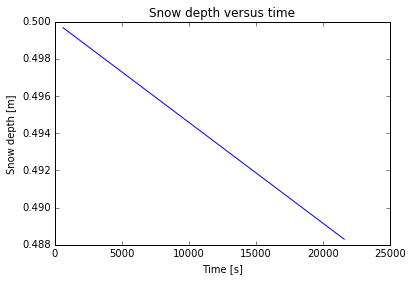

In [10]:
plt.plot(time[1:], snow_depth[1:])
plt.title('Snow depth versus time')
plt.xlabel('Time [s]')
plt.ylabel('Snow depth [m]')

**Result:** Works!